# **Project Name**    - 



##### **Project Type**    - EDA/Airbnb Bookings Analysis
##### **Contribution**    - Individual


# **Project Summary -**

**BUSINESS PROBLEM OVERVIEW**

Airbnb is a $75 Billion online marketplace for renting out homes/villas/ private rooms. The website charges a commission (3 to 20 percent, ) for every booking. Even though the prospects are sound, but there are critics who argue that this has driven up rent, and caused damage to the local communities living in the vicinity.

Airbnb hosts can use booking analysis to optimize their revenue by understanding booking patterns and demand for their listings. By analyzing booking data, hosts can determine which days of the week or months are more popular, and adjust their pricing and availability accordingly. They can also identify which amenities and features are most in demand and use this information to improve their listings.

By analyzing booking data, Airbnb hosts can identify the most effective marketing channels and campaigns for their listings. They can also identify the characteristics and preferences of their target audience and tailor their marketing messages to better resonate with them.

# **GitHub Link -**

https://github.com/Sujit769/EDA-Airbnb.git

# **Problem Statement**


**Some of the problem statements which I have indentified are as below**


>


*  What are the common room type, what information does it provide?
*  How are prices varying based on the neighbourhood?
*  Which localities have been listed more no of times?
*  What are the average room rent as per locality?
*  What’s the no of reviews based on different locations?













#### **Define Your Business Objective?**

To understand the factors that can help improving the profits of Airbnb and predict the type of bookings in the future.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

'''!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool'''

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
file_path='/content/drive/MyDrive/Datasets for DS/Airbnb Dataset/Airbnb NYC 2019.csv'
df_listings=pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df_listings.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_listings.shape

### Dataset Information

In [ ]:
# Dataset Info
df_listings.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df_listings[df_listings.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df_listings.isnull().sum())

In [ ]:
# Visualizing the missing values
sns.heatmap(df_listings.isnull(), cbar=False)

### What did you know about your dataset?

The dataset consists of data from Airbnb bookigs for the year 2019.

We have to do analysis on it and try to know which factors can help Airbnb is becming more consumer-friendly and profitable.
The dataset has 48895 rows and 16 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_listings.columns

In [ ]:
# Dataset Describe
df_listings.describe(include='all')

### Variables Description 

 

*   Id: id of the hotel.
*   name: name of the stay.
*   host_id: id of the host.
*   host_name: name of the host.
*   neighbourhood_group: the group of place where the hotel is.
*   neighbourhood: the place where the hotel is.
*   latitude: latitude of the hotel/stay.
*   longitude: longitude of the hotel/stay.
*   room_type: private/public etc.
*   price: Amount for booking.
*   minimum_nights: Min nights to be reserved for booking.
*   number_of_reviews: Total no of reviews received.
*   last_review: The date of last review.
*   reviews_per_month:Reviews received per month.
*   calculated_host_listings_count:The no of listings the host has.
*   availability_365:No of days the stay is available in a year.






### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_listings.columns.tolist():
  print("No. of unique values in ",i,"is",df_listings[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creating a copy of original dataset.
df=df_listings.copy()

In [ ]:
# Replacing Nan values with 0 in 'reviews_per_month' and 'last_review' columns.
df.fillna({'reviews_per_month':0,'last_review':0},inplace=True)
print(df.isnull().sum())

In [ ]:
#Unique values for room_type and neighbourhood_group which will be used to find further insights.
print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood_group.unique())

In [ ]:
# Find the distribution of room types
df['room_type'].value_counts()



In [ ]:
# Top 10 Apartment listings
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)


In [ ]:
# Deep dive into one of hosts for eg. 'Sonder(NYC)'
sonder_data = df[df['host_name']=='Sonder (NYC)']
sonder_data_by = sonder_data[['host_id','host_name','neighbourhood','latitude','longitude']]
sonder_data_by.head(5)

In [ ]:
# Top 10 private rooms
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)


In [ ]:
# Location wise Private room
private_data = df[df_listings['host_name']=='John']
private_data_by = private_data[['host_id','host_name','neighbourhood','latitude','longitude']]
private_data_by.head()

In [ ]:
# Top 10 shared room
private = df[df['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

In [ ]:
# Exploring neighbourhood-group
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.xlabel("Neighbourhood")
plt.ylabel("No of listings")
plt.show()
private = df[df['neighbourhood_group']=='Manhattan']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

In [ ]:
# Exploring prices across neighbourhoods - CHecking average room rent for locality
df.head()
plt.figure(figsize=(12,8))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type').rename(columns={'price':'Avg Daily Price($)'})

In [ ]:
# Top 10 expensive localities to stay
print('Top 10 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(10)

pd.DataFrame(df4)

In [ ]:
# Top 10 least expensive localities
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(10)
pd.DataFrame(df4)

In [ ]:
# Most number of localities listed
print('Localities listed most no of times')
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

# df5.head(15).plot(kind='barh')
# plt.show()
pd.DataFrame(df5.head(15))

In [ ]:
# Localities listed for least no of times
print('Localities listed least no of times')
df5.tail(15)

In [ ]:
# Analysis on how much reviews received on basis of their location which will give confidence to people to book those locations
# We are taking a threshold of 30 reviews minimum to consider a location forward
review_30 = df[df['number_of_reviews']>=30]
df2 = review_30['neighbourhood_group'].value_counts()
print(df2)


In [ ]:
#No of reviews on basis of their neighbourhood
df3=df['neighbourhood'].value_counts()
df3

In [ ]:
# The listings having zero reviews
df3=df[df['number_of_reviews']==0]
df3.head(15)
df3.shape

In [ ]:
#Listings with zero reviews across neighbourhood_group
df3=df[df['number_of_reviews']==0]
df3["neighbourhood_group"].value_counts()

### What all manipulations have you done and insights you found?

1) Found out the unique values of room_type in the listings data.
> 'Private room' 'Entire home/apt' 'Shared room'



2)Got insight into the unique values of neighbourhood_group.
> 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'








3)Distribution of Room type
 On data manipulation on 'room_type' column, I found out that the room type which is maximum in number is Entire home/apt
followed by Pruvate room and Shared room.

---

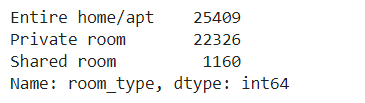

4)Top 10 apartment listings.

---
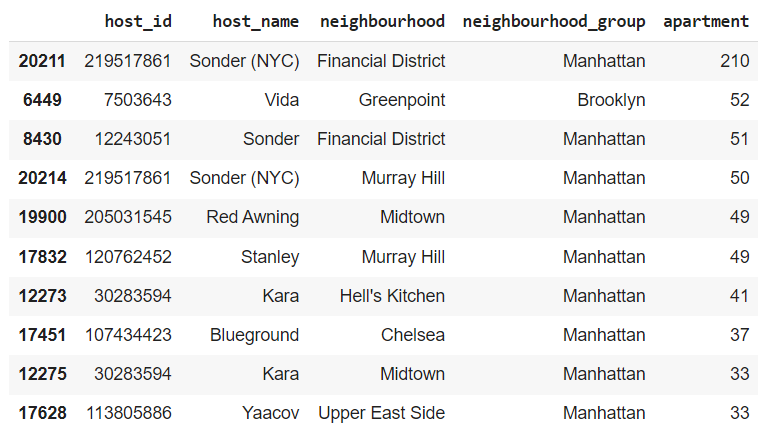


5)Deep dived into one of the hosts for eg "Sonder(NYC)"

---

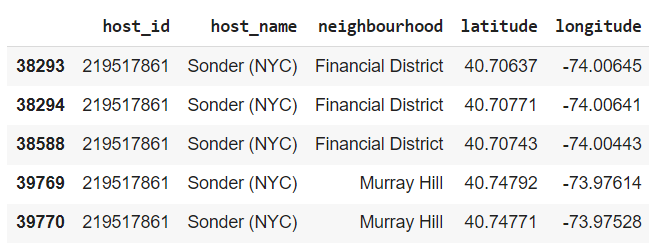

6)Found out the top 10 private rooms.

---
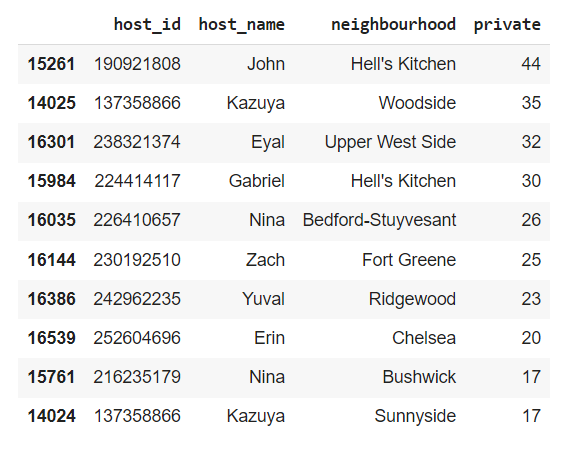


7)Top 10 shared rooms.

---
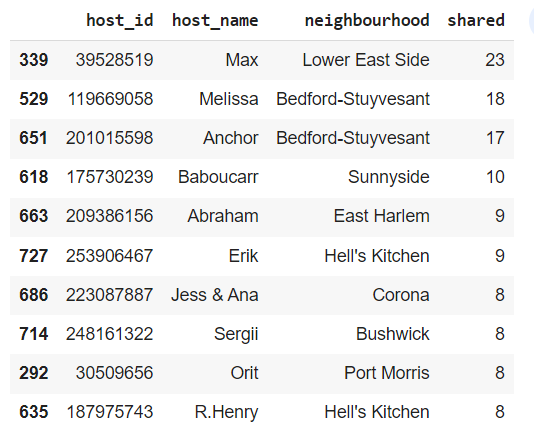


8)Explored the neihbourhood groups.
  On further analysis, found out that Manhattan has the most no of listings followed by Brooklyn,Queens,
Bronx and Staten Island.

---

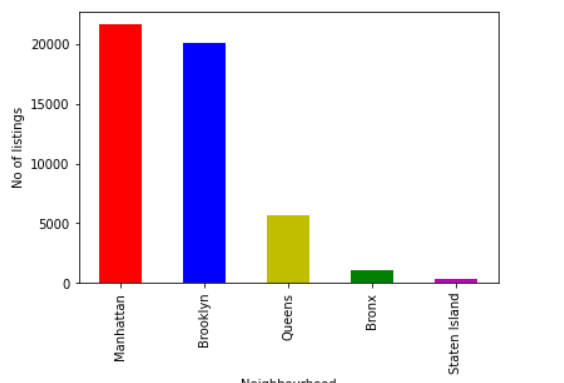

9)Explored prices across neighbourhoods
Did analysis to find out the average room rent locality-wise as well as based on room_type.

---
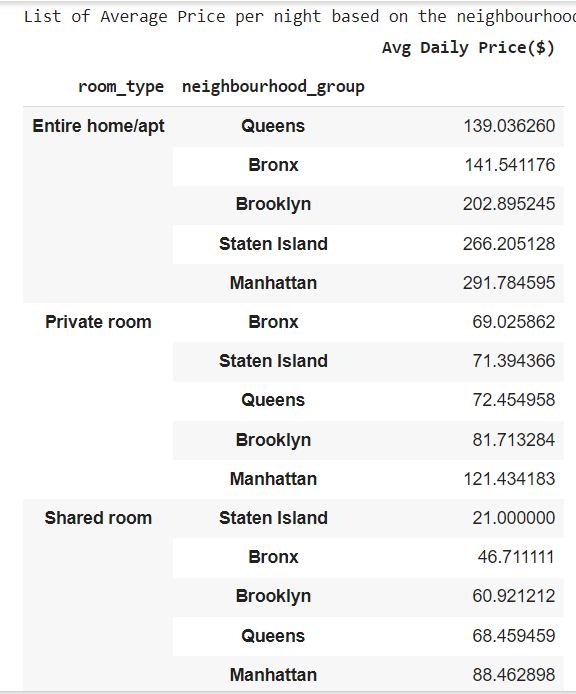


10)Found top 10 expensive locatities to stay.

---
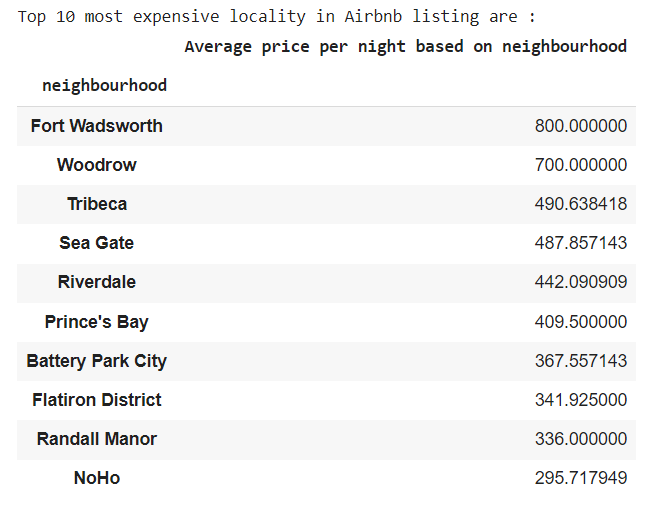


11)Found top 10 least expensive locatities to stay.

---
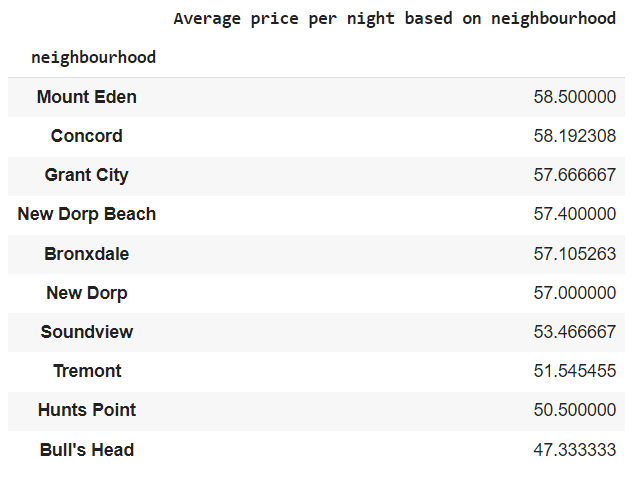


12)Performed analysis and found which locaities have been listed for the most no of times and vice versa.

---
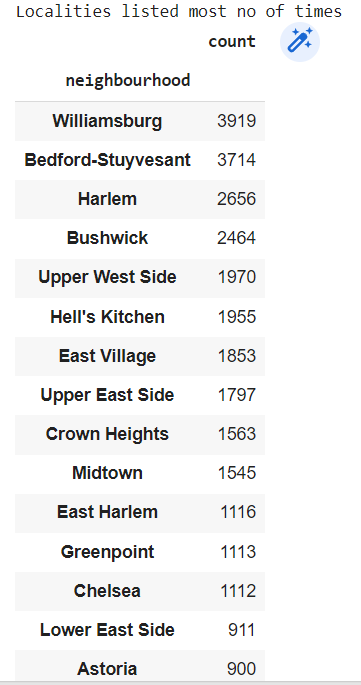
---
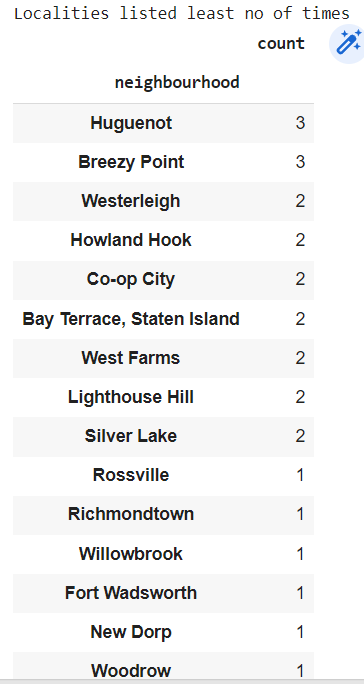


13)Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when 
it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. 

For my analysis,I have kept 30 as the minimum no of reviews to consider a location.

Some insights which I found:
Brooklyn got most review in comparison to Manhattan and that is an interesting find.Staten Island which is cheaper has less review than the other neighbourhood group.

14)Found out which neighbourhood has the highest no of reviews.

---
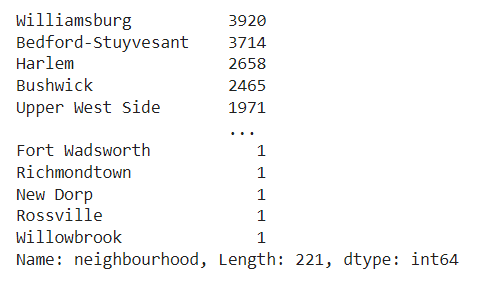
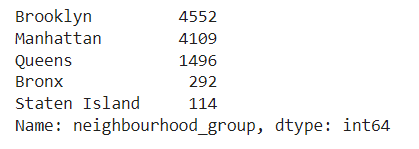

15)The number of listings which have zero reviews.
> 10052



16)The number of listings with zero reviews across neighbourhood groups.

---

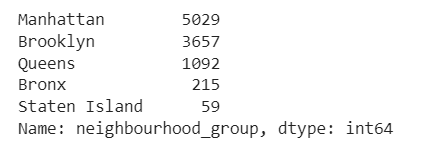

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Map pf Airbnb Locations

In [ ]:
# Chart - 1 visualization code
#Using folium library to create map of airbnb locations which can be viewed by zooming in and out.
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1






##### 1. Why did you pick the specific chart?

Since according to the dataset we have been provided with the latitude and longitude so I have used folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail.

##### 2. What is/are the insight(s) found from the chart?

We can visulaize the density of hotels and how they are scattered across the map.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By visualizing the density of hotels in an area, we can take further decisions as to which area needs more hotel infrastructure and vice-versa.

#### Chart - 2 - No of listings VS Neighbourhood(Bar Chart)

In [ ]:
# Chart - 2 visualization code
#Seeing which neighborhood has the highest number of listings
feq = df['neighbourhood'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

I have used bar chart to represent the number of listings neighbourhood-wise.

##### 2. What is/are the insight(s) found from the chart?

Williamsburg has the highest listing.Fort Greene has the lowest listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights can help us determine which neighbourhood requires more no of listings as compared to other areas.

#### Chart - 3-Distribution of room types(Bar Chart)

In [ ]:
# Chart - 3 visualization code
# Distribution of room types
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

I have used bar chart to represent the Distribution of room types.

##### 2. What is/are the insight(s) found from the chart?

The most no of room type belongs to Entire home/apt followed by Private room and Shared room.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above insight,it shows that no of shared rooms can be increased more.

#### Chart - 4-Scatter Plot to show the neighbourhood group based on Latitude and Longitude

In [ ]:
# Chart - 4 visualization code
# Scatter Plot to show the neighbourhood group based on Latitude and Longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

##### 1. Why did you pick the specific chart?

 A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables.

I have used this plot the distribution of listings on basis of their latitude and longitude.

##### 2. What is/are the insight(s) found from the chart?

Listings in Brooklyn are more dense and Staten Island are least dense.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business can increase the number of listings in Staten Island depending on other factors.

#### Chart - 5 - Bar Chart(Location vs Review)

In [ ]:
# Chart - 6 visualization code
# Location vs review
fig = plt.figure(figsize=(12,4))
review_30 = df[df['number_of_reviews']>=30]
df2 = review_30['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')


##### 1. Why did you pick the specific chart?

Because it shows the no of reviws location-wise.

##### 2. What is/are the insight(s) found from the chart?

Brooklyn got most review in comparison to Manhattan.Staten Island which is cheaper has less review than the other neighbourhood group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We have to identify why Staten island has least no of reviews and what improve on those.

#### Chart - 6-Bar Chart - Top 10 expensive localities to stay

In [ ]:
# Chart - 7 visualization code
# Top 10 expensive localities to stay
print('Top 10 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(10)

df4.plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

To represent the Top 10 expensive localities to stay.

##### 2. What is/are the insight(s) found from the chart?

Fort Wadsworth is the most expensive place to stay.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just this expensive factor is not sufficient to make any business decisions.We have to take into picture other factors such as reviews, room types etc. to make some decisions.

#### Chart - 7-Bar Chart - No of listings Vs Neighbourhood

In [ ]:
# Chart - 8 visualization code
# Most number of localities listed
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()

##### 1. Why did you pick the specific chart?

To represent the localities which have been listed the most.

##### 2. What is/are the insight(s) found from the chart?

Williamsburg has highest no of listings.Astoria has loswest no of listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On basis of other factors such as price and number of reviews, business decision can be made whether or not to increase the listings in the less listed neighbourhoods.

#### Chart - 8 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, I have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above heatmap,we can see that no of reviews & availability_365 , minimum_nights & price are positively correlated.

We can also see that no of reviews & price are negatively correlated.

Similarly, other insights can be derived from the above heatmap.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df.head(), hue="price")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.



*   To give focus on neighbourhood with less listings and understand the problems if any.
*   To go through the reviews and take appropriate action to retain the customers.
*   Stay competitive in the market with prices.
*   The prices can be increased for those listings where demand is high.We can take the help of "Availability_365" column data to analyse the demand.
*   To promote offers to attract more customers and retain old ones.
*   If viable,spend more on advertising and marketing to acquire new customers.
*   Work towards increasing ROAS(Return on Ad Spend).
*   Pinpoint who your ideal guests are, and market directly to them.
*   Track expenses regularly and try to maximize the profits.
*   Give more incentives to host with good ratings to encourage them to list more.





# **Conclusion**



*   Entire home/apartments are the highest type of room which are listed.
*   Manhattan has the most no of listings.It would be wise to spend more effort to acquire more customers there.
*   Fort Wadsworth has the most expensive listings.
*   Brooklyn,Manhattan have the most no of reviews.We can deep dive into those reviews and understand the customer sentiment.
*   Bronx,Staten Island have few reviews.We can try to look into those and understand if there is any underlying problems.
*   Manhattan has high average daily prices in all room types.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***